# __FINAL PROJECT PHASE IV__

## *Table of Contents*
1. Introduction <br>
    a. Background and Context <br>
    b. Importance and stakes of our setting <br>
    c. Data Sources and Key Terms <br>
    d. Research Question <br>
    e. Summary of Results <br>
2. Data Description <br>
    a. Brief description and discussion of reliability <br>
    b. Importing the cleaned dataset from a separate data cleaning notebook <br>
3. Visuals for data <br>
    a. Figures from Phase 2 EDA to build background understanding of our cleaned dataset <br>
5. Preregistration Statements <br>
6. Data Analysis <br>
    a. Data Exploration <br>
    b. Research Question Models (part 1) <br>
    c. Analyses of findings <br>
7. Evaluation of Significance <br>
8. Conclusions <br>
9. Limitations <br>
10. Acknowledgements and Bibliography <br>

# __1. INTRODUCTION:__

Streaming media has increasingly become popular in the 21st century, with viewers favoring on-demand content without the restrictions of a fixed broadcast schedule. Recently in 2024, the US movie market was valued at $23.44 billion (Research And Markets 2025). Widely recognized as a popular streaming service, Netflix boasts 301.6 million annual subscribers globally and a 21% US market share of streaming video on demand in 2025 (TwinStrata 2025).  
To maintain retention and achieve maximum profit, companies such as Netflix must guage which titles are popular amongst viewers. Understanding viewers also allows companies to predict how viewers would react to future shows, helping the company decide their future direction. As for viewers, they want to maximize entertainment. When choosing a film to satisfy their needs, they can turn to IMDb. IMDb is a well-known website that primarily offers ratings and reviews from fellow viewers, as well as rankings and movie information like release year. 
Given its significance, we decided to investigate Netflix viewership and IMDb ratings and genre. Research questions are presented below:

# __Research Question(s):__

### Research Questions:
What set of criteria (genre types, IMDb ratings, number of votes towards ratings, global availability) are important to obtain the most viewership on Netflix from 2023 to 2025? Are we able to accurately predict viewership according to the characteristics identified as the most influential? 

### Sub-Questions (labeled 1 through 3):
- Does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres? (1)
- In the past two years, have films needed to be globally available in order to reach high popularity in terms views of the movie? (2)
- Is there a pattern in the relationship between ratings and the number of votes a movie receives?


To conduct this research, we sourced public data from Netflix engagement reports (collected semi-annually and spanning from January 2023 to July 2025) and IMDb files. To elaborate on the set of criterias at hand, viewership is the number of hours that a user watched a movie for divided by the runtime in hours acccumulated in the provided and observed period in the engagment reports. IMDb ratings are out of 10 in ascending order where 1 is lowest and 10 is highest and collected by IMDb. Global availability is essentially whether or not a movie is able to be watched in all countries with Netflix.

### Summary of Results
We created hypothesis tests for each of our three pre-registered subquestions. Via subquestion 2 analysis, we found that globally available movies exceed non-globally available movies in popularity. In fact, via subquestion 1 analysis, we found that the global availability variable had a larger impact on popularity than ratings, number of votes, and all genres except for the Talk-Show genre. For subquestion 3, after examining the relationship between ratings and logged number of votes, we found that their relationship was weakly negative but statistically significant. We wondered if there was nuance to this relationship, and we decided to further visualize the distribution of ratings across the number of votes.


Based on the results, Netflix has actionable insights for making their future movie catalogue. Specifically, they should prioritize contracts for globally available movies since this trait is very impactful on movie popularity, defined in terms of views. Additionally, Netflix should consider adding more Talk-Show, Adventure, and Action movies, as these genres have the highest coefficients and are most positively influential for popularity.


### Data Overview & Sources:

In total, we collected seven data tables (linked below). The first five are taken from Netflix regarding semi-annual engagement reports starting from the first half of 2023 to the first half of 2025. Each report includes 2 tabs, (Shows and Films) or (Shows and Movies), and their respective data (i.e. runtime, viewership, global availability). The first half of 2023 report is an excpetion with only 1 tab of both shows and movies combined, but this gets handled in our data cleaning.

Meanwhile, the following two IMDb data tables are combined to give us an extensive IMDb table to cross reference with the Netflix engagement reports. The IMDb ratings data table contains all the movies and shows, each identified by a unique ID that is not the movie/show title. The IMDb titles data table provides these IDs and the actual title, allowing us to link each movie/show's ratings with their title. 

### Importing:

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb
from datetime import time
from sklearn.linear_model import LinearRegression, LogisticRegression
import re
import scipy.stats 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


# __2. DATA DESCRIPTION AND CLEANING:__


Here is the link to the ipynb on github of data-cleaning.ipynb: https://github.com/xuanlianliu/Data_Science_Project/blob/862fbb046f0de1b6ac9e8ad7e9c05a4367c43239/data-cleaning.ipynb

In [3]:
#Importing the cleaned dataset from our separate data cleaning notebook
netflix_df = pd.read_csv('netflix_ratings.csv')

### Brief Description and Reliability Discussion
**Why was this dataset created?**
- Our analysis ready dataset was created by joining multiple Netflix engagement reports from different periods and merged with the IMDb ratings dataset to observe if any factors had the most influence on viewership for Netflix films and predict viewership for films outside of the dataset according to observed criteria.

- The Netflix engagement report datasets were compiled from Netflix themselves to report to creators, advertisers, and viewers about performance metrics beyond just subscription numbers. These were also published to address the lack of transparency with viewership data. 

- IMDb ratings dataset was compiled to provide the global audience with one of the largest, comprehensive resource for film data. Doing so allows viewers to make informative decisions on what to watch next.

**Who funded the creation of the dataset?**\
All source datasets used during this phase and their creation were funded by either Netflix or IMDb.

**What are the observations (rows) and the attributes (columns)?**\
Each observation represents a single Netflix film that was watched within the timeframe of January 2023 to June 2025, along with their respective attributes in terms of global availability, hours viewed, runtime, views, average IMDb rating, number of votes (defined in the next cell). The cleaned dataset for analysis consists of 8772 Netflix films.

The attributes for our dataset include: 
- Title: the title of the film (must match in both Netflix and IMDb)  
- Global: either "Yes" or "No" to the film's ability to be watched in all countries with Netflix  
- Hours_Viewed: the number of hours the film was watched, accumulated in the time period  
- Runtime: the length of the film  
- Views: the Hours_Viewed multiplied by the Runtime  
- Time_Period: the time interval in which the viewership data was collected. Is measured semi-annually, either Jan-Jun or Jul-Dec  
- average_Rating: the rating given by IMDb users, out of 10 in ascending order where 1 is lowest and 10 is the highest  
- numVotes: the number of votes cast for the film  
- Is_Global: measures global availibility, encoded as 1 for films globally available and 0 for unavailable  
- Popularity: measures whether a film had more than the median views was created, encoded as 1 being popular and 0 for not popular  
- Sufficient Votes: measures whether a film recieved sufficient votes, defined as more than the median number of votes, encoded as 1 being sufficient votes and 0 for not sufficient
- Genre: the genres categorized under the movie (could be multiple)
- Each genre as their own binary column: measures if a film is categorized under that genre, encoded as 1 for genre present and 0 for not present


**Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?**
- Our dataset contains all instances of Netflix films watched from January 2023 to June 2025 and only a sample of the IMDb dataset. 

- For each Netflix dataset, they consist of all the films and shows watched within that time period. In the earliest engagement report, Netflix states that the dataset represents 99% of all viewing on Netflix, so there is low concern that data is not recorded. 

- For the IMDb datasets, they consist of all the films listed on IMDb’s online streaming database. This means that the data includes films entered into the website, spanning from the late 1800s to the present, but doesn’t include every film ever made. 

**What processes might have influenced what data was observed and recorded and what was not?**\
Because IMDb ratings are made by users, it is possible that the most recent movies or those with low audience engagement are not observed in the IMDb source dataset. However, these concerns have little impact on our cleaned dataset, which spans until June of 2025 which is 4 months ago and only has movies with over 100,000 Netflix views (thus likely getting some ratings). 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**\
Both Netflix viewers and IMDb reviewers should reasonably know that their behavior is tracked, although they may not know their data would be used to make these public datasets. Fot Netflix viewers, Netflix recommends shows based off of previous titles watched, so users know their watching is monitored. For IMDb reviewers, everyone's ratings are public on the site, so they know their ratings are not private. We do not forsee a notable change in viewing or rating behavior due to the fact that people consider that their data gets collected for a dataset. 

**What preprocessing was done, and how did the data come to be in the form that you are using?**\
As a whole, both the Netflix and IMDb original data sources were preprocssed into (mostly) consistent datasets, but the column names were not consistent with each other. Our original plan was to create a dataset containing both Netflix films and shows, but upon merging with the IMDb dataset, we discovered that many shows were missing rating information and so we decided to focus solely on films. This meant reducing our dataset, but given that we are still able to work with around 8,772 instances of films, we should have sufficient data for performing exploratory analysis. We decided to retain the majority of the attributes found in both the Netflix and IMDb datasets since our research aims to identify which factors most strongly influence viewership. Removing such attributes could limit the scope of our findings later on.

Much of the data cleaning that was performed using SQL. Our first task involved merging the IMDb datasets together, as title.ratings.tsv only contains ratings corresponding to an ID and not a film title while title.basics.tsv includes the corresponding film title along with their respective IDs. By performing a SQL join on these two datasets, we obtained a single dataframe containing both film titles and their ratings. 

The second task was to combine all of Netflix’s semi-annual engagement datasets into a master dataset. Using the UNION ALL operator in SQL, we were able to successfully retain all instances from all four datasets. During this process, we also noticed that some Netflix films contained titles in their original languages which would be a problem when merging with the IMDb dataset that only has titles in English. To ensure consistent title matching, we cleaned up the film titles by removing the extra info that followed // by simply replacing a part of the title string with an empty string. Additionally, for titles that had it, we cleaned the film titles by removing the year in parenthesis.

Once that was done, we performed an inner join between our Netflix and IMDb datasets using the shared column Title. This join type allowed us to keep only instances of the Netflix dataset with corresponding IMDb data, so our dataset would not have missing rating values. 

Additionally, we created binary variables like Is_Global, Popularity, SufficientVotes, and genre columns, to support our exploratory analysis. 

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).**\
All raw source data can be found on the Github folder which can also be accessed here. 
https://github.com/xuanlianliu/Data_Science_Project

# __3. Visuals for Data:__

Below are some figures from our Phase 2 EDA to better explain our data.

### Movie Viewership based on Ratings and Global Availability:

Linear Regression (x - ratings, y - viewership), Avg Views on each rating as bar graph

To help gauge whether or not there is a relationship between Views and Ratings and the relationship between Views and Global Availability, we need a series of graphs.

Conduct a scatterplot analysis on the number of views for a movie based on the ratings and global availability.

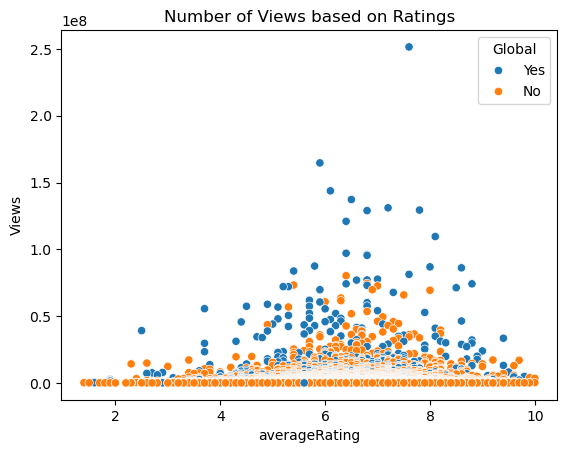

In [4]:
plot = sns.scatterplot(netflix_df, 
             x='averageRating', y='Views', marker='o', hue="Global")
plt.title("Number of Views based on Ratings");

### Correlation and Regression

Now, we will create a multi-variable correlation matrix to examine the strength and directions of relationships with the following variables: Views, Hours Viewed, Runtime, Global Availability, Average Rating, Number of Votes, and Popularity.

In [5]:
corr_df = netflix_df[['Views', 'Hours_Viewed', 'Runtime', 'Is_Global', 
                              'averageRating', 'numVotes', 'Popularity']].corr()
corr_df

,Views,Hours_Viewed,Runtime,Is_Global,averageRating,numVotes,Popularity
Views,1.000000,0.984740,0.032210,0.204273,0.024329,0.076107,0.506801
Hours_Viewed,0.984740,1.000000,0.093044,0.192332,0.032566,0.085206,0.493946
Runtime,0.032210,0.093044,1.000000,-0.102778,0.146545,0.157440,0.067750
Is_Global,0.204273,0.192332,-0.102778,1.000000,-0.013763,-0.071690,0.187042
averageRating,0.024329,0.032566,0.146545,-0.013763,1.000000,0.111752,0.015965
numVotes,0.076107,0.085206,0.157440,-0.071690,0.111752,1.000000,0.156044
Popularity,0.506801,0.493946,0.067750,0.187042,0.015965,0.156044,1.000000


The correlation matrix displays a very high correlation, 0.98, between Views and Hours Viewed, and this clearly makes sense because being viewed (the number of views) is linked with being viewed (in hours). We also observe a positive correlation of 0.20 between Views and being globally available, a positive correlation of 0.02 between Views and Average Rating, a postive correlation of 0.07 between Views and Number of Votes, and 0.51 between Views and Popularity.

We will fit a linear regression model predict view counts given the ratings.

The model's slope is: 166377.03
The model's intercept is: 1524470.06


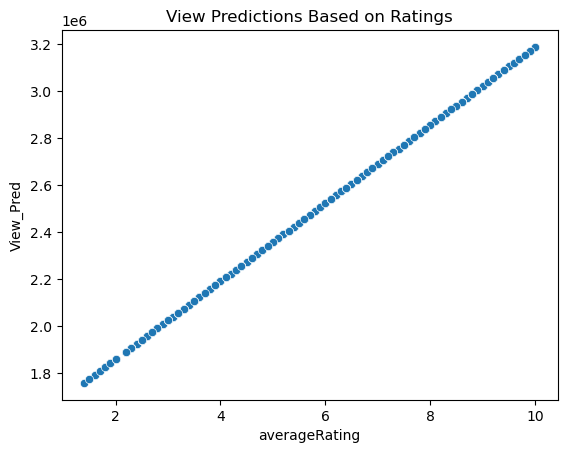

In [6]:
no_nan_df = netflix_df.copy().dropna()
x = no_nan_df[['averageRating']].values
y = no_nan_df[['Views']].values

ratings_model = LinearRegression().fit(x,y)
print("The model's slope is: " + str(round(float(ratings_model.coef_[0][0]),2)))
print("The model's intercept is: " + str(round(float(ratings_model.intercept_[0]),2)))

no_nan_df["View_Pred"] = ratings_model.predict(x)
plot2 = sns.scatterplot(no_nan_df, 
             x='averageRating', y='View_Pred')
plt.title("View Predictions Based on Ratings");


We will fit a logistic regression model to determine the coefficient and intercept to see how the odds of the popularity change for each unit of increase in ratings.

In [7]:
x = netflix_df['averageRating'].values.reshape(-1, 1)
y = netflix_df['Popularity']
model = LogisticRegression().fit(x,y)

print(model.coef_[0][0])
print(model.intercept_[0])

0.03261969647139088
-1.6141352980528392


Using the model's predict_proba, we can find the probability of a movie being successful based on the average rating.

<Axes: xlabel='averageRating', ylabel='popularity_pred'>

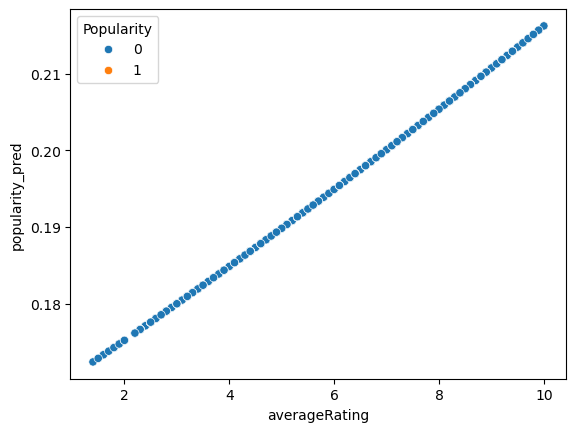

In [8]:
netflix_df['popularity_pred'] = model.predict_proba(netflix_df[
    ['averageRating']].values)[:, 1]
sns.scatterplot(x = netflix_df['averageRating'], 
                y = netflix_df['popularity_pred'], hue = netflix_df['Popularity'])                                                           

### Global Availability Pie Charts:

The following pie charts are meant to visualize the bearing that the trait of global analysis has on popularity. Findings are stated at the end of this section.

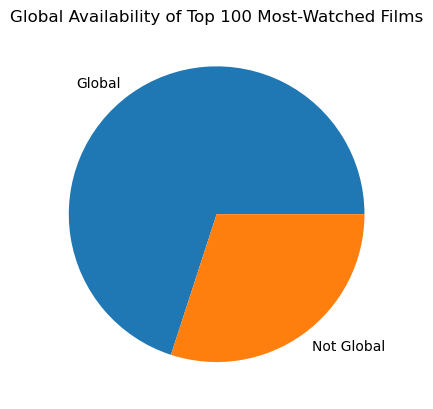

In [9]:
#Top 100 viewed films by global availability
netflix_top_100 = duckdb.sql("""SELECT *
                                FROM netflix_df
                                WHERE Views is NOT NULL
                                ORDER BY Views
                                DESC LIMIT 100""").df()
yes_count = (netflix_top_100["Global"]=="Yes").sum()
no_count  = (netflix_top_100["Global"]=="No").sum()

y = np.array([yes_count, no_count])
mylabels = ["Global", "Not Global"]

plt.pie(y, labels = mylabels)
plt.title("Global Availability of Top 100 Most-Watched Films")
plt.show() 

#creating pie chart source:
#https://www.w3schools.com/python/matplotlib_pie_charts.asp

Out of the most 100 most viewed films in our dataset, approximately 2/3 of them are globally available and 1/3 are not globally available. Below, let's look more closely at whether or not this phenomenon occurs across all films and the statistical significance of global availability. 

# __4. PREREGISTRATION STATEMENT(S):__
Sub-question 1: Does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres?
- $H_0$: Global availability IS NOT the most impactful variable on the movie popularity.
- $H_A$: Global availability IS the most impactful variable on the movie popularity.

Rationale: Because globally available shows can technically reach more individuals, it is likely that it is highly influential in terms of viewership and therefore popularity.  Comparing the impact of global availability to ratings, number of votes, and genres, global availability logically seems to reach more people, as not everyone looks at ratings, number of votes, or different types of genres.  It is more niche.  Therefore, the null hypothesis is likely to be rejected.

Sub-question 2: In the past two years, have globally available films performed better than non-globally available ones to reach high popularity in terms views of the movie?
- $H_0$: Globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views.
- $H_A$: Globally available movies ARE better than non-globally available movies in being popular, defined in terms of views.

Rationale: Based on the pie chart of the top 100 films from the section above, it seems like being globally available does make a film more likely to be popular. Intuitively, this makes sense for two reasons. First, being available globally means a larger audience who may watch the film. Second, when an audience truly likes a film, they will spread it to others, and being global increases the potential for this viral sharing. Therefore, I believe that the null hypothesis has a high chance of being rejected.

Sub-question 3: Is there a direct linkage between ratings and number of votes such that number of votes predicts rating? (3)
- $H_0$: Number of votes DOES NOT predict films' rating at all. 
- $H_A$: Number of votes DOES predict film's rating.

Rationale: Exploring the relationship between movie ratings and the number of votes is valuable because it can reveal whether ratings serve as a reliable indicator of audience engagement and if the ratings variable can meaningfully contribute to our broader research question on popularity criteria. In many cases, a movie that has a high rating but few votes may reflect a small audience, while a movie with many votes and a moderate rating might better indicate public interest. We’re interested in identifying patterns in how ratings change with increasing vote counts: do ratings stabilize as more viewers contribute, or do they remain inconsistent (simply no pattern)? This analysis will allow us to assess whether ratings alone is a criterion for predicting viewership and avoid misleading conclusions that are based only on the raw number ratings.

Analysis: Conduct a Spearman correlation test to see whether or not number of votes and ratings move together. Observe the printed correlation value to see if ratings tend to increase or decrease a considerable amount as number of votes increases and use the pvalue to determine if there is significance such that number of votes predicts ratings. Following that, run an OLS regression test with the log transformed number of votes as input and film rating as the output. To see if ratings can be predicted in a linear model, evaluate beta coefficient, pvalue, and R^2 value. 


# __5. DATA ANALYSIS:__

**Analysis of pre-registration statement 1 is below:**

This bar chart allows us to interpret the popularity of a movie based on the Genre of the movie.  It seems that the Comedy and Drama genres have the most popular movies among them.

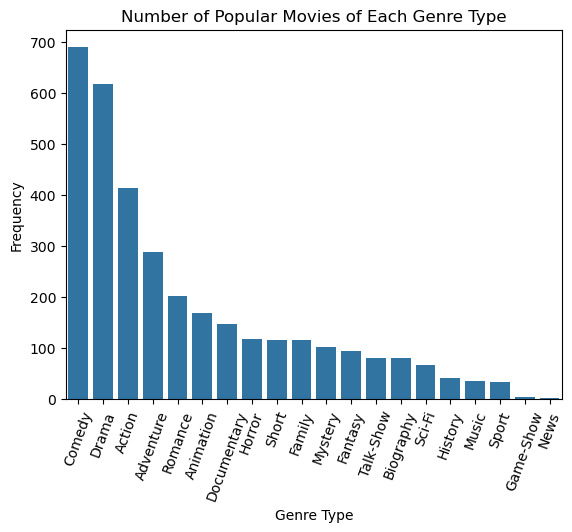

In [10]:
#Creating a bar plot see see which of the genres have the highest frequency of being a popular movie
genres = ["Genre: Romance",
        "Genre: Comedy",
        "Genre: Animation",
        "Genre: Documentary",
        "Genre: Sport",
        "Genre: Horror",
        "Genre: Fantasy",
        "Genre: Sci-Fi",
        "Genre: Drama",
        "Genre: News",
        "Genre: Action",
        "Genre: Mystery",
        "Genre: Family",
        "Genre: Adventure",
        "Genre: Biography",
        "Genre: History",
        "Genre: Music",
        "Genre: Short",
        "Genre: Game-Show",
        "Genre: Talk-Show"]
popular_df = netflix_df[netflix_df["Popularity"] == 1][genres]
sums = []


for g in genres:
    sums.append(popular_df[g].sum())

new_genres = ["Romance",
        "Comedy",
        "Animation",
        "Documentary",
        "Sport",
        "Horror",
        "Fantasy",
        "Sci-Fi",
        "Drama",
        "News",
        "Action",
        "Mystery",
        "Family",
        "Adventure",
        "Biography",
        "History",
        "Music",
        "Short",
        "Game-Show",
        "Talk-Show"]
df = pd.DataFrame({
    "Genre": new_genres,
    "Frequency": sums
}).sort_values("Frequency",ascending=False)
sns.barplot(df, x="Genre", y="Frequency")
plt.xlabel("Genre Type")
plt.ylabel("Frequency")
plt.title("Number of Popular Movies of Each Genre Type")
plt.xticks(rotation=70)
plt.show()

Once we understand how Genres relate to popularity, it is time to see how much all variables like global availability, number of votes, ratings, and the various Genres affect the prediction of popularity through Logistic Regression.  We also want to add some very common genre combinations (Romance Comedy, Action Adventure, and Drama Romance) as interaction variables as they likely are somewhat related to one another.  

In [11]:
#Multivariable Logistic Model to predict movie popularity

#Add the relevant interaction variables between the genres into X
netflix_df["Romance__x__Comedy"] = netflix_df["Genre: Romance"] * netflix_df["Genre: Comedy"]
netflix_df["Action__x__Adventure"] = netflix_df["Genre: Action"] * netflix_df["Genre: Adventure"]
netflix_df["Drama__x__Romance"] = netflix_df["Genre: Drama"] * netflix_df["Genre: Romance"]

X = netflix_df[["Is_Global",
                "averageRating",
                "numVotes",
                "Genre: Romance",
                "Genre: Comedy",
                "Genre: Animation",
                "Genre: Documentary",
                "Genre: Sport",
                "Genre: Horror",
                "Genre: Fantasy",
                "Genre: Sci-Fi",
                "Genre: Drama",
                "Genre: News",
                "Genre: Action",
                "Genre: Mystery",
                "Genre: Family",
                "Genre: Adventure",
                "Genre: Biography",
                "Genre: History",
                "Genre: Music",
                "Genre: Short",
                "Genre: Game-Show",
                "Genre: Talk-Show",
                "Romance__x__Comedy",
                "Action__x__Adventure",
                "Drama__x__Romance"]]
y = netflix_df["Popularity"]
model = LogisticRegression(max_iter=10000).fit(X,y)
print("The Is_Global coefficient is: " + str(round(float(model.coef_[0][0]),3)))
print("The averageRating coefficient is: " + str(round(float(model.coef_[0][1]),3)))
print("The numVotes coefficient is: " + str(round(float(model.coef_[0][2]),3)))
print("The Genre: Romance coefficient is: " + str(round(float(model.coef_[0][3]),3)))
print("The Genre: Comedy coefficient is: " + str(round(float(model.coef_[0][4]),3)))
print("The Genre: Animation coefficient is: " + str(round(float(model.coef_[0][5]),3)))
print("The Genre: Documentary coefficient is: " + str(round(float(model.coef_[0][6]),3)))
print("The Genre: Sport coefficient is: " + str(round(float(model.coef_[0][7]),3)))
print("The Genre: Horror coefficient is: " + str(round(float(model.coef_[0][8]),3)))
print("The Genre: Fantasy coefficient is: " + str(round(float(model.coef_[0][9]),3)))
print("The Genre: Sci-Fi coefficient is: " + str(round(float(model.coef_[0][10]),3)))
print("The Genre: Drama coefficient is: " + str(round(float(model.coef_[0][11]),3)))
print("The Genre: News coefficient is: " + str(round(float(model.coef_[0][12]),3)))
print("The Genre: Action coefficient is: " + str(round(float(model.coef_[0][13]),3)))
print("The Genre: Mystery coefficient is: " + str(round(float(model.coef_[0][14]),3)))
print("The Genre: Family coefficient is: " + str(round(float(model.coef_[0][15]),3)))
print("The Genre: Adventure coefficient is: " + str(round(float(model.coef_[0][16]),3)))
print("The Genre: Biography coefficient is: " + str(round(float(model.coef_[0][17]),3)))
print("The Genre: History coefficient is: " + str(round(float(model.coef_[0][18]),3)))
print("The Genre: Music coefficient is: " + str(round(float(model.coef_[0][19]),3)))
print("The Genre: Short coefficient is: " + str(round(float(model.coef_[0][20]),3)))
print("The Genre: Game-Show coefficient is: " + str(round(float(model.coef_[0][21]),3)))
print("The Genre: Talk-Show coefficient is: " + str(round(float(model.coef_[0][22]),3)))
print("The Romance__x__Comedy coefficient is: " + str(round(float(model.coef_[0][23]),3)))
print("The Action__x__Adventure coefficient is: " + str(round(float(model.coef_[0][24]),3)))
print("The Drama__x__Romance coefficient is: " + str(round(float(model.coef_[0][25]),3)))



The Is_Global coefficient is: 1.282
The averageRating coefficient is: 0.017
The numVotes coefficient is: 0.0
The Genre: Romance coefficient is: -0.075
The Genre: Comedy coefficient is: 0.038
The Genre: Animation coefficient is: 0.266
The Genre: Documentary coefficient is: -0.36
The Genre: Sport coefficient is: 0.114
The Genre: Horror coefficient is: 0.03
The Genre: Fantasy coefficient is: 0.312
The Genre: Sci-Fi coefficient is: 0.033
The Genre: Drama coefficient is: -0.215
The Genre: News coefficient is: 0.057
The Genre: Action coefficient is: 0.555
The Genre: Mystery coefficient is: 0.067
The Genre: Family coefficient is: 0.226
The Genre: Adventure coefficient is: 0.349
The Genre: Biography coefficient is: 0.161
The Genre: History coefficient is: -0.049
The Genre: Music coefficient is: -0.407
The Genre: Short coefficient is: 0.232
The Genre: Game-Show coefficient is: -0.077
The Genre: Talk-Show coefficient is: 1.731
The Romance__x__Comedy coefficient is: 0.416
The Action__x__Adventure

Because the coefficients are significantly higher in the Talk-Show Genre and the Is_Global variable, they likely have more of an impact on popularity.  To verify this, we have to look at the p-values of all variables and to see whether to reject the null hypothesis or fail to reject.  This is done through the logit() funciton, where we can see a summary table that contains the z-score and also the P-Value.

In [12]:
#Summary Table to compare impacts of global availability, ratings, number of votes, and genres
X = sm.add_constant(X)
X = X.loc[:, X.nunique() > 1]  # remove all-zero or all-one columns
X = pd.get_dummies(X, drop_first=True)
logitModel = sm.Logit(y, X).fit()
print(logitModel.summary())

Optimization terminated successfully.
         Current function value: 0.459419
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Popularity   No. Observations:                 8733
Model:                          Logit   Df Residuals:                     8707
Method:                           MLE   Df Model:                           25
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                 0.07493
Time:                        23:51:30   Log-Likelihood:                -4012.1
converged:                       True   LL-Null:                       -4337.1
Covariance Type:            nonrobust   LLR p-value:                4.191e-121
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Is_Global                1.1795      0.065     18.254      0.000       1.053       1.306

Since many of the p-values are 0.000 to be able to gauge the most impact, we may need to see more than just 3 decimal places, so here we show more precise p-values for each variable.

In [13]:
print(logitModel.pvalues)

Is_Global               1.919771e-74
averageRating           1.780503e-92
numVotes                2.952878e-40
Genre: Romance          3.506537e-02
Genre: Comedy           2.754483e-04
Genre: Animation        3.147260e-02
Genre: Documentary      8.654258e-06
Genre: Sport            8.086830e-01
Genre: Horror           8.129851e-05
Genre: Fantasy          1.190076e-01
Genre: Sci-Fi           4.477256e-01
Genre: Drama            2.718757e-07
Genre: News             4.839617e-01
Genre: Action           2.331624e-03
Genre: Mystery          6.043078e-01
Genre: Family           7.636985e-01
Genre: Adventure        7.281310e-02
Genre: Biography        4.881052e-01
Genre: History          7.012479e-01
Genre: Music            8.443594e-03
Genre: Short            3.195529e-01
Genre: Game-Show        4.839388e-01
Genre: Talk-Show        2.073958e-23
Romance__x__Comedy      3.384432e-03
Action__x__Adventure    3.660715e-01
Drama__x__Romance       4.279357e-01
dtype: float64


Interpretation: 
To determine whether to reject the null hypothesis, we have to first look at the P-value of Is_Global to gauge whether or not Global availability has an impact on popularity.  We see that the P-value of Is_Global is 0.000, which is less than 0;  therefore, Global availability has a significant impact.  

Once we know that global availability has a significant impact, we have to see if it has the most impact.  To do this, we essentially need to compare the global availability's p-value to all other variables, where lower values mean more significance to popularity.  Then, we compare the z-score of each variable, where a higher magnitude illustrates more significance.  Lastly, we compare the coefficients of the variables, where a higher magnitude also illustrates more significance.  Essentially, the variable with the most impact has the smallest p-value with a high magnitude of z and the coefficient.

From the above p-values, we see that Is_Global and averageRating have the lowest p-value with 1.919771e-74 and 1.780503e-92, respectively, which means the most significance to popularity in terms of p-values.  We can also then see that Is_Global and averageRating have the highest magnitude of z with 18.254 and -20.397, respectively.  This means that these two have the most significance to popularity in terms of z-scores.  

Now, we can take a look at the coefficients of these two variables to determine the most impact.  We can see that Is_Global has a coefficient of 1.1795.  However, Is_Global is a boolean while averageRating is not, so we have to give averageRating some scaling before comparing the values.  We can approximate the scaling constant c to be 4 (found by making 0.25\*c closer to 1); therefore, the averageRating coefficient is scaled to -0.25\*4 = -1.0.  We can see now that Is_Global has a larger coefficient, so we can conclude that Is_Global is the most impactful variable.

Therefore, we would reject the null hypothesis and conclude that Global availability may be the most impactful variable on movie popularity.

**Analysis of pre-registration statement 2 is below:**

In [14]:
#define the number of movies
N= len(netflix_df)

#find probability of non-global movie being popular
not_global_df= duckdb.sql("""SELECT *
FROM netflix_df
WHERE Global== 'No'""").df()
not_global_and_popular= (not_global_df["Popularity"]==1).sum()

not_global_and_popular_share= not_global_and_popular/len(not_global_df)

#calculate number of expected popular movies if global and non-global movies perform the same
expected_popular= N*not_global_and_popular_share
print(f"Given that global and non-global movies perform the same,\n"  
      f"the expected number of non-global popular movies is {expected_popular}")
print(f"The actual number of non-global popular movies is {not_global_and_popular}")

#calculate standard deviation of number number of globally available popular movies
sd= np.sqrt(N*not_global_and_popular_share*(1-not_global_and_popular_share))

#calculate z-score
z_score= (not_global_and_popular- expected_popular)/sd
print(f"The z-score is: {z_score}")

#calculate p-value
print(f"The p-value is: {scipy.stats.norm.sf(abs(z_score))}")

Given that global and non-global movies perform the same,
the expected number of non-global popular movies is 1404.2267045454546
The actual number of non-global popular movies is 1132
The z-score is: -7.930091495562879
The p-value is: 1.094922437080195e-15


Interpretation: The p-value is much smaller than our alpha of 0.05, so we reject the null that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views.

**Analysis of pre-registration statement 3 is below:**

First, we’ll explore the main variables discussed in preregistration #3: ratings and number of votes. 

In the following two histograms, we can visualize the distributions of each variable independently. 

For the ratings distribution, we roughly observed a bell shaped distribution indicating that majority of the movies are rated as average to good (rating peak between 6 and 7). Meanwhile, only a small portion of movies are extremely high/low rated which can be seen at the respective tails of the distribution.

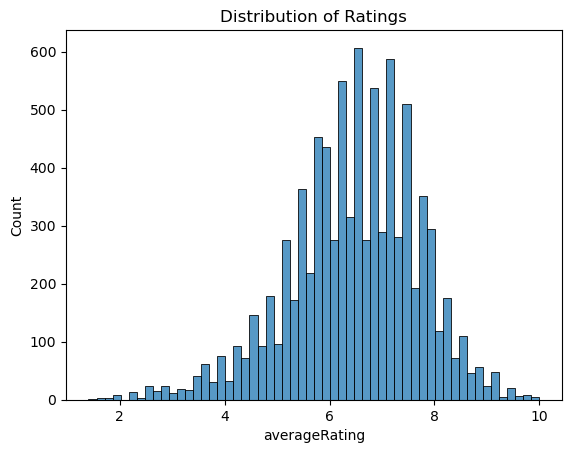

In [15]:
sns.histplot(netflix_df['averageRating'])
plt.title("Distribution of Ratings")
plt.show()


For the number of votes distribution, the numVotes variable is extremely right-skewed due to some films having huge vote counts (in the millions). Using a log scale on this variable will allow for the distribution to become more readable. In the log transformed graph, the pattern is more visible. Here, there is a right skewed patten suggesting that majority of the movies in our dataset accumulated few votes and only a small portion of movies accumulated large vote counts.

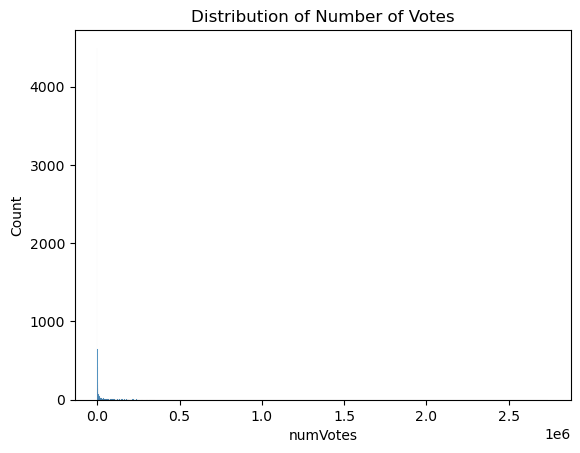

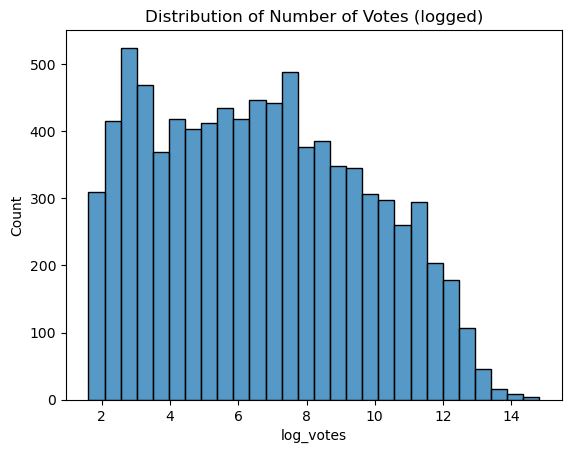

In [23]:
#not log transformed
sns.histplot(netflix_df['numVotes'])
plt.title("Distribution of Number of Votes")
plt.show()

#log transform numVotes since the distribution is not normal
netflix_df['log_votes'] = np.log(netflix_df['numVotes'])
sns.histplot(netflix_df['log_votes'])
plt.title("Distribution of Number of Votes (logged)")
plt.show()

With a scatterplot, we can plot the logged number of votes on the x-axis and ratings on the y-axis to visualize how the average rating changes in relation to the vote count. We can also observe if there are any clusters at the very high/low ratings and if these could be attributed to low vote counts. We can also see if more votes will stabilize ratings to a certain value. 

From the graph, it's clear that there is no strong linear relationship as the points cluster between the rating scores of 5 and 8 and stretch across the number of votes. Movies with few votes show great variance in ratings, acknowledging extreme ratings and movies with a considerable amount of votes display more stability within their ratings with almost no movies falling below the rating of 4. 


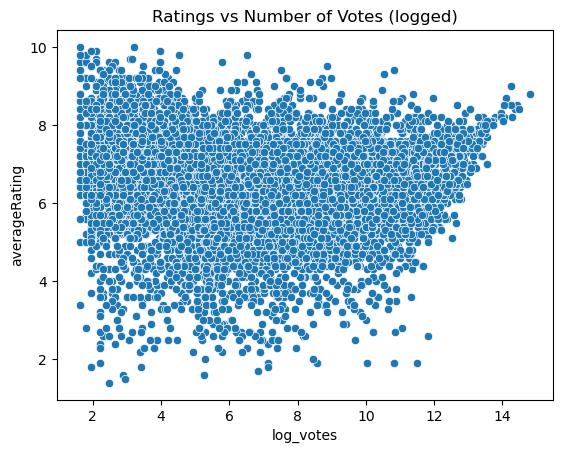

In [22]:
sns.scatterplot(netflix_df, x = 'log_votes', y= 'averageRating')
plt.title("Ratings vs Number of Votes (logged)")
plt.show()

We can first compute the Spearman correlation to observe if the number of votes and rating move together.

From the printed outputs, it seems there is a statistically significant (as seen from the pvalue) but extremely weak negative relationship between ratings and number of votes. Vote counts doesn't seem to have the ability to meaningfully predict the rating.

In [18]:
corr, p_value = scipy.stats.spearmanr(netflix_df['log_votes'], netflix_df['averageRating'])
print("correlation:", corr)
print("p-value:", p_value)

correlation: -0.14686277880130041
p-value: 2.6453978539305187e-43


Running OLS (ordinary least squares) will allow us to get a full picture of how log_votes relates to rating. 

**Analysis and Interpretation for Preregistation #3**\
Summarizing
- A 1-unit increase in log_votes causes the rating to drop by 0.09. Films that become massively more popular see a slight decrease in their ratings. So, more popularly rated movies see slightly lower ratings than those with less votes. 
- A pvalue of 0.000 indicates that the effect is statistically significant – this negative relationship is not due to chance.
- Overall, the relationship is weak but statistically significant. 

Making predictions
- The regression equation for our model is averageRating = 6.6678 - 0.0851(log_votes)
- If log_votes goes up by 0 (num_votes = 1), we observe the averageRating to be around 6.67.
- If log_votes goes up by 2.30 (num_votes = 10), we observe the averageRating to be around 6.47.
- If log_votes goes up by 11.51 (num_votes = 100,000), we observe the averageRating to be around 5.49.

Noting oddities 
- With R-squared being 0.008, the number of votes variable explains only a small proportion, 0.8%, of the variability in ratings. Other factors might be influencing the outcome and are worth considering.
- The model allows us to input 0 and negative number of votes (which equates to an undefined set of real numbers with log_votes) but still predicts a relatively high rating, which does not make sense.


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           9.18e-25
Time:                        23:51:42   Log-Likelihood:                -14196.
No. Observations:                8733   AIC:                         2.840e+04
Df Residuals:                    8731   BIC:                         2.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7487      0.032    211.836      0.0

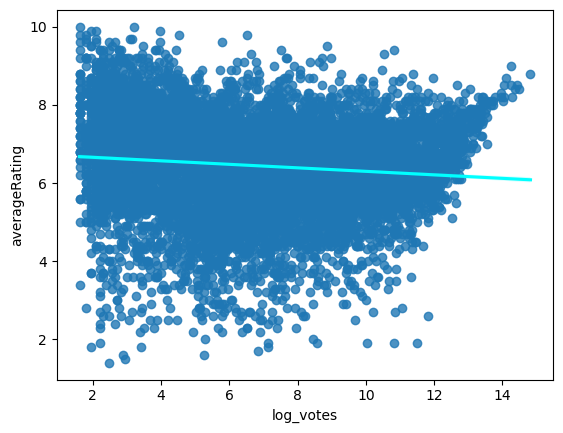

In [19]:
X = netflix_df['log_votes']
X = sm.add_constant(X)
y = netflix_df['averageRating']

model = sm.OLS(y, X).fit()
print(model.summary())

#visualize regression line
sns.regplot(netflix_df, x="log_votes", y='averageRating', line_kws={"color": "cyan"})
plt.show()


Although the OLS model provided an overall linear relationship between number of votes and rating, the small effect size suggested that a linear model might be insufficient. This drew us to examine more closer in the pattern of this relationship. More specificially, it raised questions about how ratings behaved across the spread of vote counts -- whether films with few votes tend to receive extremely high or low ratings and whether large vote counts stablize around a central value. 

To further analyze this, we can implement a box plot that observes ratings across different vote count bins. 

From here we can see that the low vote count bins have the highest median ratings around 7, middle bins having a lower rating around 6.2, and the high vote bins to rise again to 6.6. This U-shaped pattern suggests that the relationship between number of votes and ratings is not monotonic which might have explained why our OLS regression slope was very small.  

Films with very few votes show the widest spread of ratings, so extreme ratings are more prone here. With a limited number of votes, ratings can easily be skewed by a small portion of biased viewers (satisfied or dissatisfied) which raises concerns on the ratings credibility. Additionally, the heavy concentration of outliers on the bottom whisker reveal that while low vote count films recieve unusually high ratings, the more common pattern is that these films are more prone to extremely negative ratings. 

As the number of votes increases, the spread of ratings becomes narrower and the high vote count bins' median ratings converge to to a central value around 6.4. With more viewers rating a film, the rating stabilizes to reflect the broader audience and so for majority of these films, we can expect ratings between 6 and 7 to be more accurate. 

Ratings might not necessarily be a reliable indicator of popularity simply because ratings are biased by vote count size (low count films don't represent public consensus) and high ratings don't imply large audiences & popularity (and vice versa) -- popular films can have average ratings around the central value and niche films could have higher ratings but don't have a substantial amount of votes and viewership. Instead, number of votes might be a better indicator since it is more directly associated with the number of viewers that engage with a film.

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(4.999, 35.0]'),
  Text(2, 0, '(35.0, 263.0]'),
  Text(3, 0, '(263.0, 1669.0]'),
  Text(4, 0, '(1669.0, 14796.4]'),
  Text(5, 0, '(14796.4, 2739789.0]')])

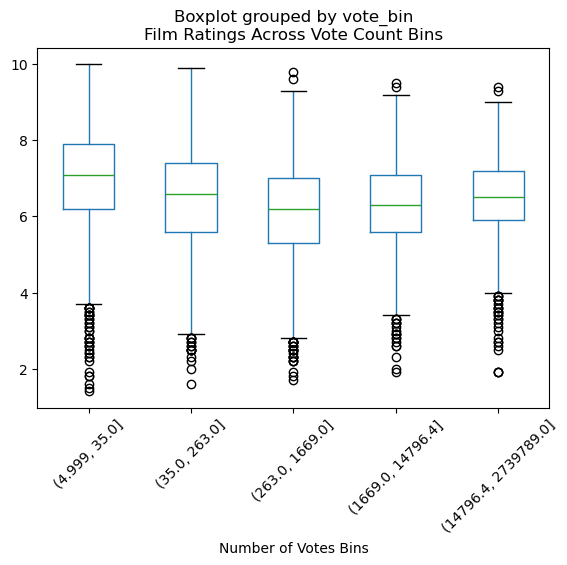

In [20]:
#create bins for number of votes (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
netflix_df['vote_bin'] = pd.qcut(netflix_df['numVotes'], q=5)

netflix_df.boxplot(column = 'averageRating', by = 'vote_bin', grid = False)
plt.title('Film Ratings Across Vote Count Bins')
plt.xlabel("Number of Votes Bins")
plt.xticks(rotation=45)


Running the analysis of the following preregistrations revealed global availability to be a strong variable in determining film popularity.

Using train_test_split, we'll create two new dataframes, `netflix_train` and `netflix_test`, with 20% of the data in the test set to find the coefficient values and make predictions on film popularity. 

We'll visualize the predictions with a confusion matrix and utilize a classification report to see how well the classifier performed. From the outputs, the model does well in identifying non popular film. When predicting a film that is not popular, 81% of the films are correctly predicted (where precision = 0.81 or 1398 TN / 1792 predicted). The model also correctly identifies 100% of all nonpopular films (recall = 1.00 or 1398 TN / 1403 actually nonpopular).

However, when it comes to identifying popular films, it differs. With a precision of 0.41, 41% of the predicted popular films are actually popular and with a recall of 0.03, only 3% of the actual popular films were identified. This low recall value indicates that 97% of the popular films are labeled as not popular which might not be helpful in discovering popular films. 

It seems that our model predicts not popular for majority of the films, as seen in the high precision and recall, but doesn't do the best in detecting popular films.

Train: (6986, 38)
Test: (1747, 38)
Is_Global: 1.16
numVotes: 0.0
intercept: -1.84
4614    0
324     0
8065    0
7059    0
2187    0
Name: Popularity, dtype: int64
0.8066132264529058
2025    0
6091    0
6751    0
3645    0
5919    0
Name: Popularity, dtype: int64
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1393
           1       0.41      0.03      0.05       354

    accuracy                           0.80      1747
   macro avg       0.60      0.51      0.47      1747
weighted avg       0.72      0.80      0.72      1747



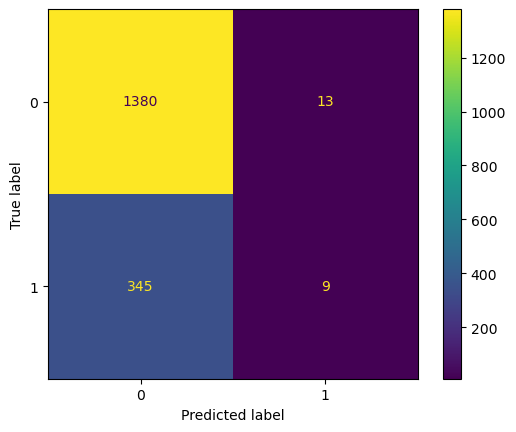

In [24]:
netflix_train, netflix_test = train_test_split(netflix_df, test_size = 0.2)
print("Train:", netflix_train.shape)
print("Test:", netflix_test.shape)

variables = ["Is_Global", "numVotes"]

model = LogisticRegression()
model.fit(netflix_train[variables], netflix_train['Popularity'])

for variable, coef in zip(variables, model.coef_[0]):
    print(str(variable) + ": " + str(np.round(coef, 2)))

print("intercept: " + str(np.round(model.intercept_[0], 2)))

#determine proportion of train set that has been predicted correctly
train_predictions = model.predict(netflix_train[variables])
residuals = netflix_train['Popularity'] - train_predictions
print(residuals.head())

print(residuals.value_counts()[0] / len(train_predictions))

#predict with the test set
test_predictions = model.predict(netflix_test[variables])
residuals = netflix_test['Popularity'] - test_predictions
print(residuals.head())

#visualizing with a confusion matrix (https://www.w3schools.com/python/python_ml_confusion_matrix.asp)
confusion_matrix = metrics.confusion_matrix(netflix_test['Popularity'], test_predictions)
metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [0, 1]).plot()

#view precision and recall (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
print(metrics.classification_report(netflix_test['Popularity'], test_predictions))

# __6. EVALUATION OF SIGNIFICANCE:__

**Pre-registration Statement 1:** To determine the variable that had the most effect on the popularity of a movie, we turned to a Logistic Regression with a Logit function.  Based on the coefficients of each variable, we have determined that the Global availability of a movie and having a genre, talk-show, are the highest contributors to the popularity of a movie.  However, we found that the coefficient for the talk show had a coefficient of 1.517, which is greater than the Global availability’s coefficient of 1.2542.  With the P-value of both these variables being 0.000, we can establish that we will reject the null hypothesis of Global availability not being the most impactful variable on movie popularity, as their p-values are the same, but the talk-show has a higher coefficient.

**Pre-registration statement 2:** The analysis for global availability’s effect on popularity involved a hypothesis test with a bernoulli variable. If there is no difference in popularity between global and non-global movies, a movie’s probability of being popular is 0.16031073. Given that global and non-global movies perform the same, the expected number of non-global popular movies is 1406, but the actual number of non-global popular movies is 1135 movies. In other words, the actual number of non-global popular movies is 271 lower than expected if the null hypothesis is true. After calculating the z-score and using it as the parameter for the scipy.stats.norm.sf(abs(z_score)) function, the resulting p-value is 1.4684026891657207e-15, which is essentially 0. There is nearly 0 possibility of randomly getting the observed 1135 non-global popular movies if global availability has no statistically significant relationship with popularity. Ultimately, the p-value is lower than the significance level of 0.05, so we reject the null hypothesis that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views. 

**Pre-registration statement 3:** To observe the full statistical picture of the relationship pattern between the logged number of votes and ratings, we used both Spearman correlation and OLS for analysis. Utilizing Spearman allowed us to assess the strength and direction of this relationship where we we observed the correlation coefficient to be -0.12 with a pvalue < 0.05. Simply put, there is a weakly negative but statistically significant relationship where ratings decrease slightly as number of votes increases. 

This was further reinforced by the OLS regression, where the coefficient of log_votes was -0.09 with a pvalue of 0.000. While small, this effect is statistically significant and goes to show how number of votes can shape overall ratings, even by a little. If we apply these findings to movie-rating behavior, the coefficient makes sense -- movies that receive rating inputs from larger, broader audiences will eventually produce a slightly lower rating that is representative of the public consensus. From the pvalues calculated above, both are lower than the significance level of 0.05, so we reject the null hypothesis and claim that there is a weak negative relationship between the variables. 

# __7. CONCLUSION:__

There is strong evidence that global availability is the most important variable for number of views. Via the 1st preregistration statement, global availability had the second highest coefficient, only behind Talk Show genre. However, the Talk Show genre is a small subset of potential movies. It is not possible to hugely increase the number of Talk Show movies since the producers may not have so much ability to create endless amounts of high-quality talk show films. On the other hand, with the second highest coefficient, global availability is also a key factor for viewership, and unlike Talk Show genre, it is applicable for all movies. Next, the 2nd preregistration statement’s result is that there is nearly 0 possibility of randomly getting the observed number of non-global popular movies if global availability has no statistically significant relationship with popularity. Therefore, the entire 2nd preregistration statement’s analysis furthers the claim that global availability is most important for viewership. Finally, the 3rd preregistration analysis revealed a weakly negative but statistically significant relationship between number of votes and ratings. While this relationship is present, it is not exactly strong, as seen in our Spearman and OLS regression coefficient values. It seems that the ratings variable would not provide meaningful contributions in predicting film viewership in comparison to other criteria like global availability. Because of how small the relationship effect is and the fact that low vote count films are more prone to bias, ratings would only offer limited predictive values and not give us the full picture of film popularity. While this variable may hold little weight in answering our main research question, further exploratory analysis suggested that number of votes could be considered as better criterion for determining popularity.

Taking our findings from our registration analysis, we were able to conclude a set of criteria that Netflix could refer to when selecting popular films to maximize user rentention and viewership. Findings suggested that Netflix should prioritize on acquiring globally available films and focus on genres that highly influence popularity, such as talk shows, adventure, and action. 

Shifting to the second half of our research question (Are we able to accurately predict popularity according to the characteristics identified as the most influential?) and the train-test split, the results revealed that our classifier based on said criteria was able to perform well in identifying non-popular films for the most part but falls short in predicting ability when it comes to popular films. This might suggest that there are other variables our data currently does not include that likely contribute to popularity. 
It seems that global availability, along with a set of niche genres, are key determinants of film viewership across Netflix's catalog. With these insights, Netflix now has a concrete strategy for planning its content for the future. By identifying films likely to be popular, Netflix can confidently prioritize these titles that are expected to drive  user satisfaction while potentialy increasing user subscriptions and profits. 

# __8. DATA LIMITATIONS:__


Limitations of potential harms and data gaps:  
-**Timespan Limitation**: Our dataset only covers a 2.5-year period worth of Netflix data spanning from January 2023 to June 2025. The short timeframe makes it hard to generalize our findings to other years and their films. This makes the Netflix executives prone to adding movies with certain genres that are recent phenonmeons but not reflective of the long-term trend, and thus Netflix’s future viewership won’t be as high as desired.  
-**Filling Missing Data Limitation**: The first half of 2023 dataset was missing 2 important variables: runtime and number of views. We filled these missing columns with their respective averages of known data, but this approach risks suggesting a consistent pattern across all the first half of 2023 films. While the missing values have been addressed, these are not exactly the true runtime and views, meaning our data analysis is biased. Just as how the timespan limitation hurts the decision-making process, the Netflix executives to select future movies that are not the best choice since the part of the model is formed by assumed data.  
-**Duplicate Title Limitation**: Our Netflix dataset contains duplicates of certain films as they appeared in multiple engagement reports during collection. To address this, we removed the duplicates and kept only the instance with its max views. We chose this instance for the following reason: each engagement report tracks only the viewership during that period because views reset in the reports. The maximum views in a period makes sense to represent when the film reaches peak popularity. Such removal of all non-maximum instances reduces the total number of views for certain Netflix time periods and alter our observations of viewership over time. Our data analysis underestimates the movies with sustained popularity over multiple half-year periods. When deciding future movies, the Netflix executives will be more likely to look for instant hits. From a viewer perspective, they will likely be recommended new films more frequently because Netflix won’t value films with sustained long-term popularity as much.  
-**Film Titles Limitation**: Not every Netflix title matches with an IMDb rating. We lost many films in the Netflix engagement that were missing ratings. This harms our predictions of viewership based on ratings because many films are missing from the analysis. Specifically when considering naming across Netflix and IMDb, we think the titles with complex titles and those with alternate release names in different regions are most likely to not have exact matches between Netflix and IMDb, due to formatting inconsistencies. This could affect the analysis by disproportionately reducing the number of regional films compared to international, widespread films, making it appear that regional films are less watched than in reality. As a result, the Netflix executives will over-favor selecting global films, which harms Netflix viewership and is to the detriment of the viewers who won’t have as many regional films available to them.  
-**IMDb limitations**: Anyone on IMDb can rate a film. Not all reviews are the same quality because there is no verification of whether or not they truly watched the film or have external motives (e.g., review bombing to troll or rating highly just because their favorite actor is in it). This could impact our analysis by creating trends that do not exist from those who did not watch the movie as a genuine viewer. In addition, people who rated films on IMDb may have watched them in ways other than Netflix. In other words, the ratings bring in people who are not related with Netflix into our cleaned dataset, so our analysis could be inaccurate if the Netflix reviewers think differently compared to non-Netflix reviewrs. Overall, Netflix executives will be selecting future movies based on the opinions of non-Netflix audiences, resulting in non-optimal choices.
We observe variation in the number of votes that determined each film’s IMDb rating. Films with a smaller number of votes could skew the rating, which could ultimately affect our analysis of how ratings correlate with viewership.  
-**Population Variable Limitation**: Mainstream movies are likely to garner more viewership than indie movies. Since we took the pure average of views to determine the baseline for what makes a movie popular, it means that many mainstream movies will automatically be considered popular because of their high view count. In our results, the number of mainstream movies are disproportionately high since other qualities that determine popularity are not accounted for. Therefore, Netflix executives will select more mainstream movies, and those looking for indie movies will have more difficulty finding what they want on Netflix.  

Limitations of significance metrics:  
-**Multivariable Logistic Regression Limitation, overfitting**: To analyze subquestion 1 (does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres?), the multi-variable logistic regression included twenty different genre variables. We included all of these genres because it took this many genres to capture 98% of all films in our dataset, which was our desired percentage for the most representative dataset possible. Having twenty genre variables results in overfitting (the model shapes itself too closely to our dataset). As a result, it does not generalize to the entire population of Netflix films including those outside our dataset. When choosing future films, Netflix executives will incorrectly select ones similar to the patterns in our dataset, not the more general pattern for all Netflix films.  
-**Multivariable Logistic Regression Limitation, multi-collinearity**: In our dataset, a single film could take on multiple genres. We thought some genres would be correlated with others. For example, Romance and Comedy have positive correlation. Therefore, we manually coded a few interaction variables (we did not interact all the 20 genres to prevent further overfitting). The number of interactions is our human decision, and it might not be optimal. Our efforts of adding estimation variables is better than nothing, but incomplete. The genre coefficients are not accurate, and it’s not possible to know the true significance of each genre on popularity. Netflix executives may be misguided when choosing future films by genre.   
-**OLS Model Limitation**: For our 3rd question (Is there a direct linkage between ratings and number of votes such that number of votes predicts rating?), we utilized an OLS model to analyze the relationship between number of votes and average rating.  Just because the statistic value is very good, that doesn’t mean we have full confidence in our model. The true relationship between votes and ratings may not be linear, but OLS assumes linear relationships. As a result, the OLS model may be unreliable, causing the Netflix executives to be make incorrect future film selections.

# __9. ACKNOWLEDGEMENTS AND BIBLIOGRAPHY:__


We used some outside sources to help us with code, and these sources are cited within their code cell.

Below are the data sources we used in this project.

Source for Netflix Engagement Report First Half 2023: https://about.netflix.com/en/news/what-we-watched-a-netflix-engagement-report

Source for Netflix Engagement Report Second Half 2023: https://about.netflix.com/en/news/what-we-watched-the-second-half-of-2023

Source for Netflix Engagement Report First Half 2024: https://about.netflix.com/en/news/what-we-watched-the-first-half-of-2024

Source for Netflix Engagement Report Second Half 2024: https://about.netflix.com/en/news/what-we-watched-the-second-half-of-2024

Source for Netflix Engagement Report First Half 2025: https://about.netflix.com/en/news/what-we-watched-the-first-half-of-2025

Source of IMDb Ratings for Movies/Shows: https://datasets.imdbws.com/title.ratings.tsv.gz

Source of IMDb Movie/Show Titles: https://datasets.imdbws.com/title.basics.tsv.gz

Netflix market share: https://www.twinstrata.com/netflix-subscribers-statistics/

Movie industry market size: https://www.researchandmarkets.com/report/united-states-film-motion-picture-market?srsltid=AfmBOoommR66u7lneiyqtxGU_mtwCg322TPnN4lHaFdDPQKPVGvyx0tK 


